<a href="https://colab.research.google.com/github/sasan-osmannezhad/test/blob/main/image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import numpy
from tensorflow import keras
from keras.constraints import maxnorm
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Dropout, Flatten
from keras.layers import BatchNormalization
from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix
from keras.utils import np_utils
from keras.datasets import cifar10
import matplotlib.pyplot as plt

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()


170498071/170498071 [==============================] - 2s 0us/step


In [3]:
X_test.shape

(10000, 32, 32, 3)

In [4]:
y_train[0]

array([6], dtype=uint8)

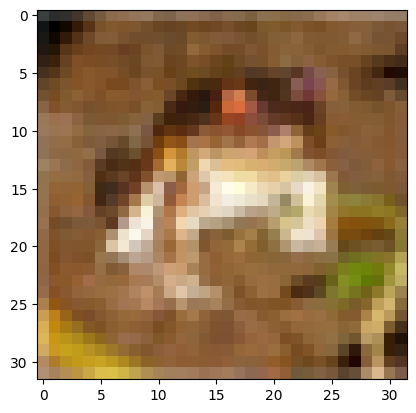

In [5]:
plt.imshow(X_train[0])


In [6]:
# Normalize the inputs from 0-255 to between 0 and 1 by dividing by 255
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0


In [7]:

# One-hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [8]:

y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [9]:
num_class = y_test.shape[1] #10

In [10]:
X_train.shape[1:]

(32, 32, 3)

In [11]:
model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', input_shape=X_train.shape[1:], activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(MaxPool2D(2))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(MaxPool2D(2))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Dense(num_class, activation = 'softmax'))


In [12]:
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 64)        0

In [14]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=64)

Epoch 1/10
782/782 [==============================] - 26s 16ms/step - loss: 1.5336 - accuracy: 0.4573 - val_loss: 1.2347 - val_accuracy: 0.5580
Epoch 2/10
782/782 [==============================] - 11s 14ms/step - loss: 1.0872 - accuracy: 0.6195 - val_loss: 0.9038 - val_accuracy: 0.6874
Epoch 3/10
782/782 [==============================] - 12s 15ms/step - loss: 0.9222 - accuracy: 0.6773 - val_loss: 0.7790 - val_accuracy: 0.7244
Epoch 4/10
782/782 [==============================] - 13s 17ms/step - loss: 0.8321 - accuracy: 0.7122 - val_loss: 0.7083 - val_accuracy: 0.7553
Epoch 5/10
782/782 [==============================] - 10s 13ms/step - loss: 0.7689 - accuracy: 0.7329 - val_loss: 0.7091 - val_accuracy: 0.7531
Epoch 6/10
782/782 [==============================] - 11s 14ms/step - loss: 0.7179 - accuracy: 0.7490 - val_loss: 0.6578 - val_accuracy: 0.7723
Epoch 7/10
782/782 [==============================] - 11s 14ms/step - loss: 0.6724 - accuracy: 0.7662 - val_loss: 0.6726 - val_accuracy:

In [17]:
for key,val in history.history.items():
  print(key)

loss
accuracy
val_loss
val_accuracy


In [15]:
import pandas as pd

<Axes: >

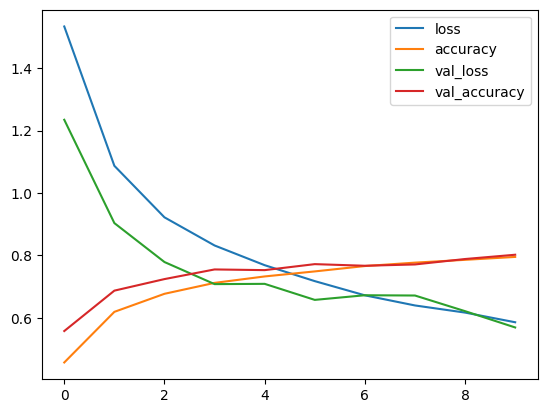

In [16]:
pd.DataFrame(history.history).plot()

<function matplotlib.pyplot.show(close=None, block=None)>

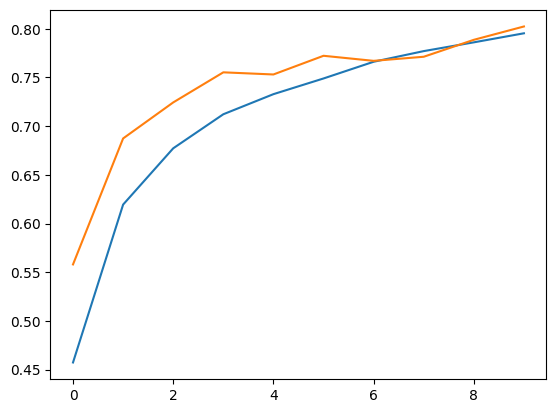

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show

In [19]:
model.save('CNN_cifar10.h5')

In [20]:
model2 = load_model('CNN_cifar10.h5')

In [21]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [22]:
import numpy as np
import seaborn as sns; sns.set()

In [23]:
np.argmax(model2.predict(X_test[0:10])[0])

1/1 [==============================] - 0s 403ms/step


3

In [34]:

import numpy as np
import seaborn as sns; sns.set()


In [33]:
labels[3]


'cat'

In [27]:

y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [35]:
predictions = model.predict(X_test)
print(predictions.shape)
predictions = np.argmax(predictions, axis = 1)
print(predictions)

313/313 [==============================] - 1s 2ms/step
(10000, 10)
[3 8 8 ... 5 1 7]
